## Lecture Notes on Tree Based Methods from JosePortilla_UDEMY - Henric Jandoc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree Learning

In [2]:
plt.style.use(['science', 'notebook','grid','no-latex'])

In [3]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\penguins_size.csv')

In [4]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [13]:
df.at[336, 'sex'] = 'FEMALE'

In [14]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

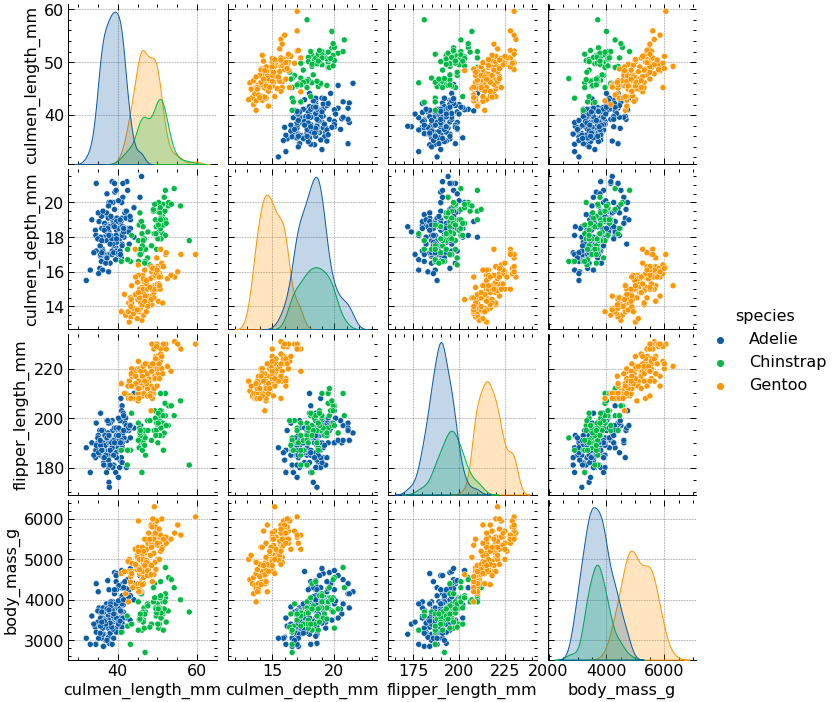

In [15]:
sns.pairplot(df, hue = 'species')

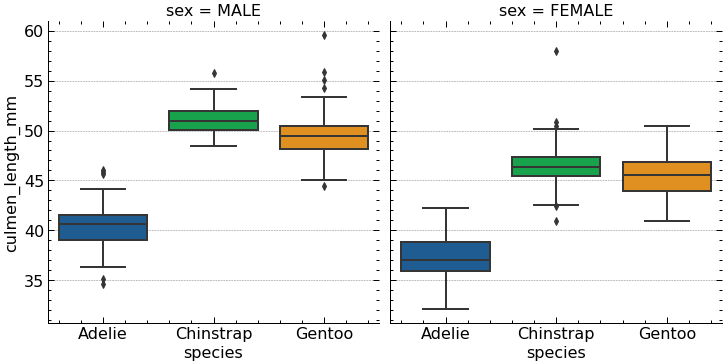

In [16]:
sns.catplot(x = 'species', y = 'culmen_length_mm', data = df, kind = 'box', col = 'sex')

In [17]:
df['island']

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object

In [18]:
pd.get_dummies(df.drop('species', axis = 1), drop_first = True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [19]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)
y = df['species']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier()

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
base_preds = model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [27]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



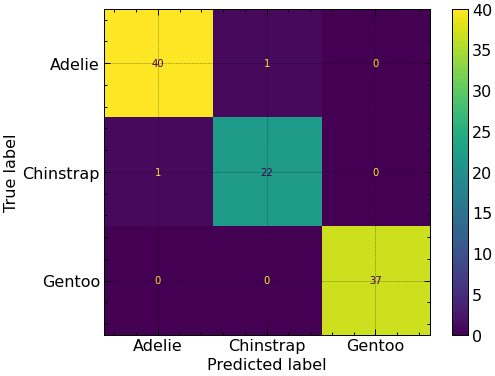

In [28]:
plot_confusion_matrix(model, X_test, y_test)

In [29]:
model.feature_importances_

array([0.32591819, 0.05366774, 0.53120101, 0.01085298, 0.0681854 ,
       0.01017467, 0.        ])

In [30]:
pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
sex_MALE,0.000000
island_Torgersen,0.010175
body_mass_g,0.010853
culmen_depth_mm,0.053668
island_Dream,0.068185
culmen_length_mm,0.325918
flipper_length_mm,0.531201


In [31]:
from sklearn.tree import plot_tree

[Text(223.2, 298.98, 'X[2] <= 206.5\ngini = 0.633\nsamples = 233\nvalue = [105, 45, 83]'),
 Text(121.74545454545454, 244.62, 'X[0] <= 42.35\ngini = 0.418\nsamples = 147\nvalue = [104, 42, 1]'),
 Text(81.16363636363636, 190.26000000000002, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(162.3272727272727, 190.26000000000002, 'X[4] <= 0.5\ngini = 0.274\nsamples = 50\nvalue = [7, 42, 1]'),
 Text(81.16363636363636, 135.9, 'X[1] <= 16.0\ngini = 0.245\nsamples = 7\nvalue = [6, 0, 1]'),
 Text(40.58181818181818, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(121.74545454545454, 81.53999999999999, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(243.49090909090907, 135.9, 'X[0] <= 44.2\ngini = 0.045\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(202.90909090909088, 81.53999999999999, 'X[3] <= 3850.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(162.3272727272727, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(243.49090909090907, 

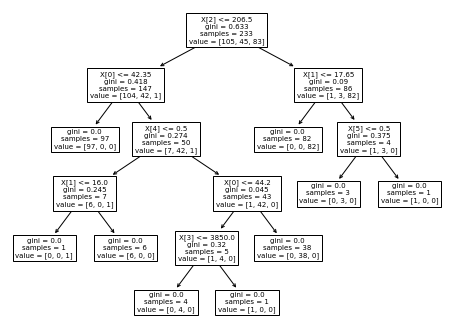

In [32]:
plot_tree(model)

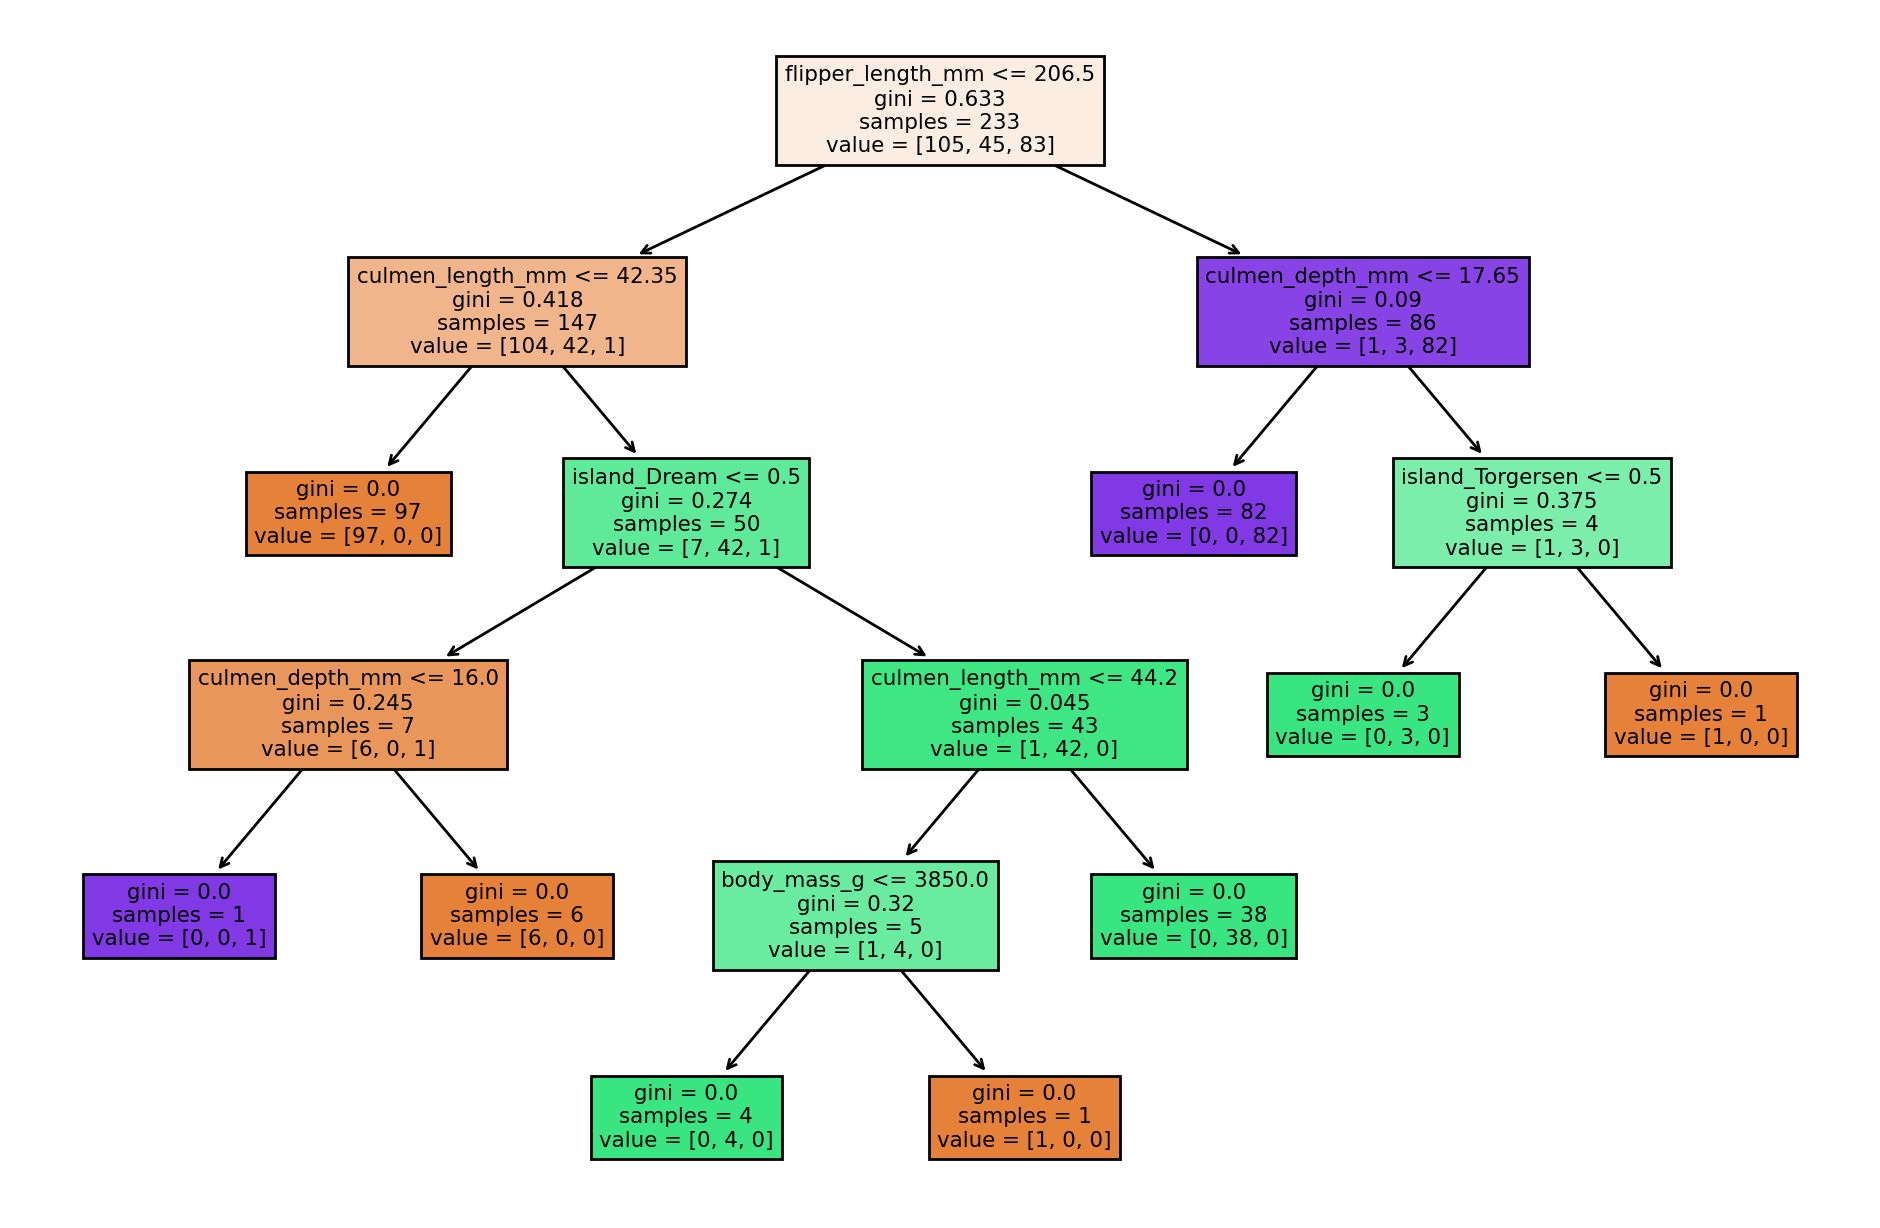

In [33]:
plt.figure(figsize = (12,8), dpi = 200)
plot_tree(model, feature_names = X.columns, filled = True);

In [34]:
len(X_train)

233

In [35]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize = (12,8), dpi = 200)
    plot_tree(model, feature_names = X.columns, filled = True);

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





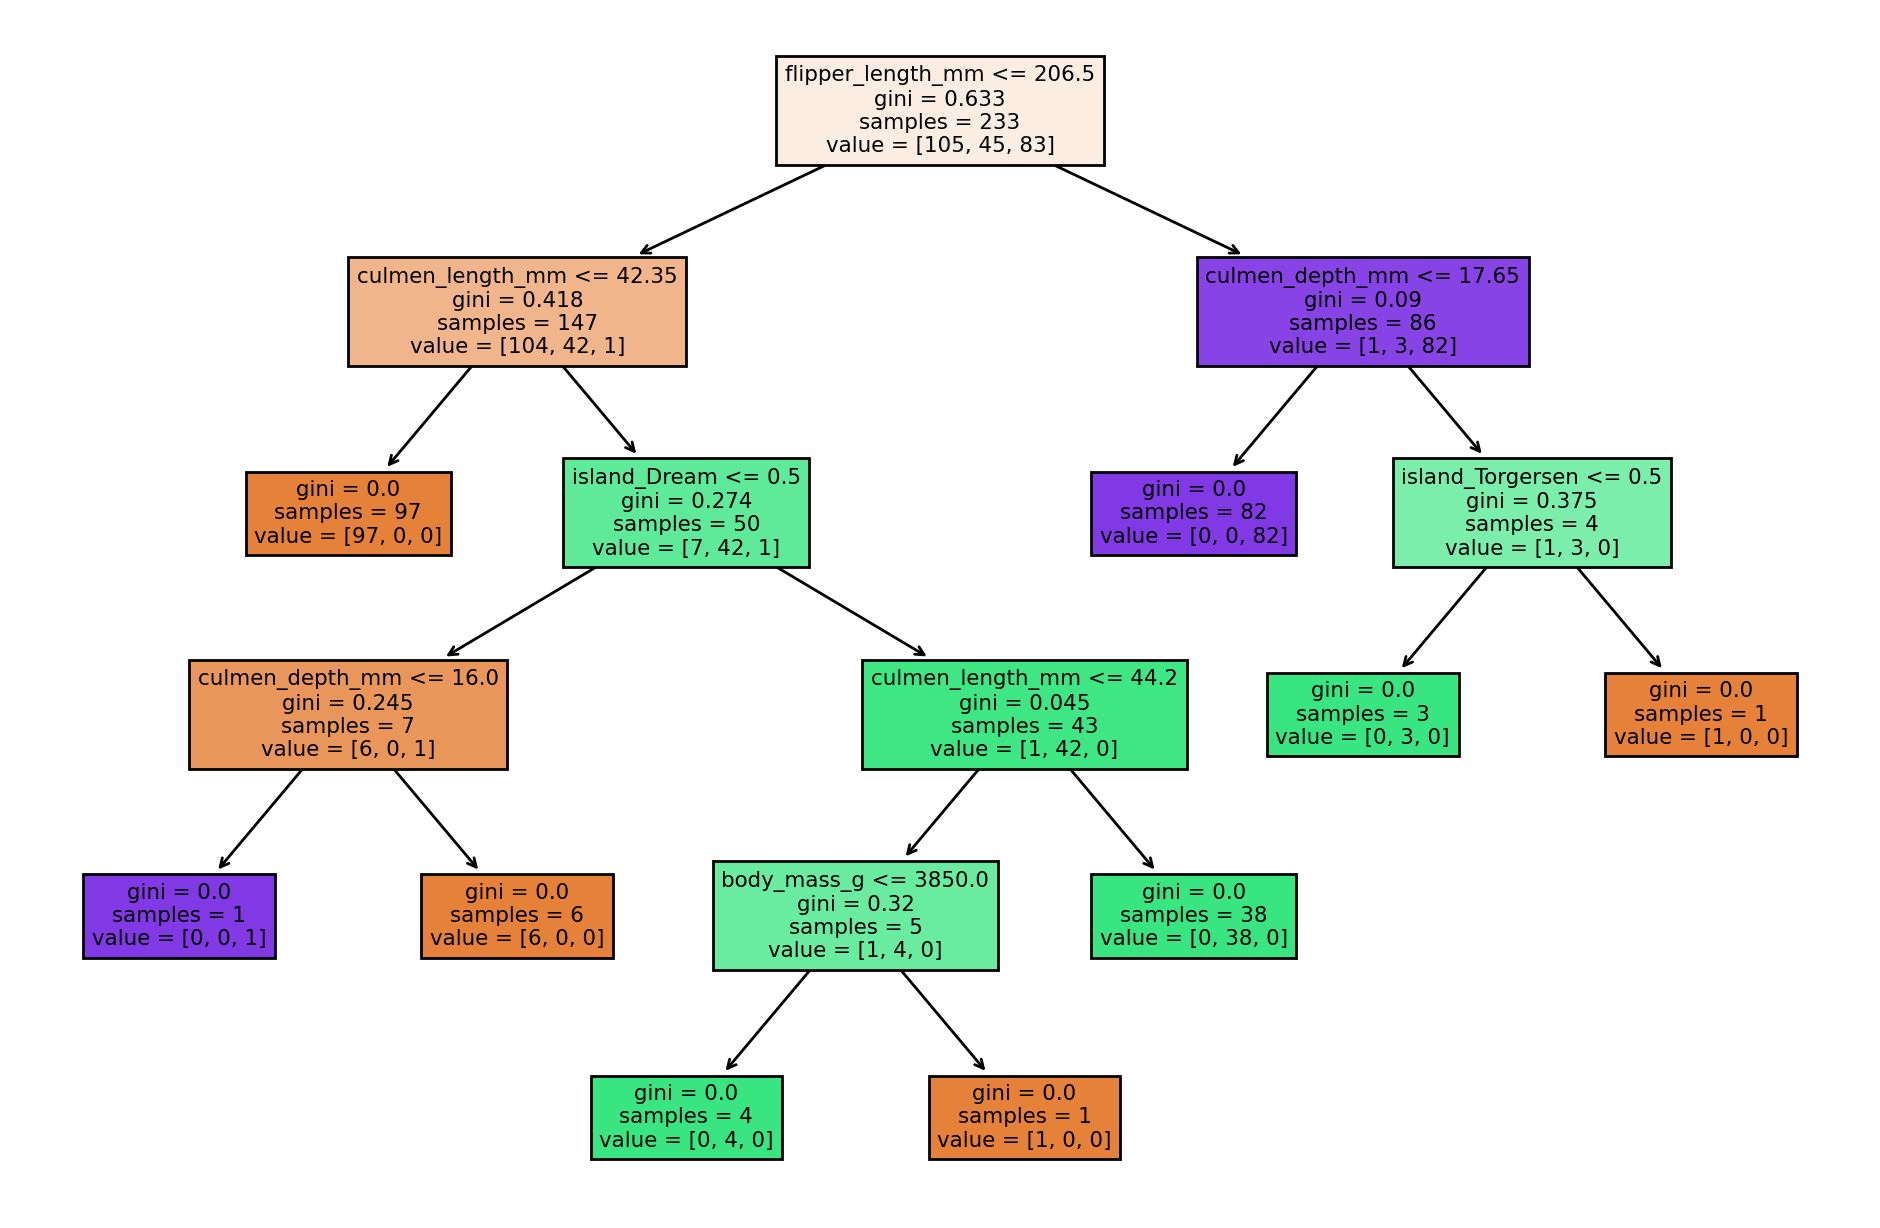

In [36]:
report_model(model)

In [37]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)

In [38]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





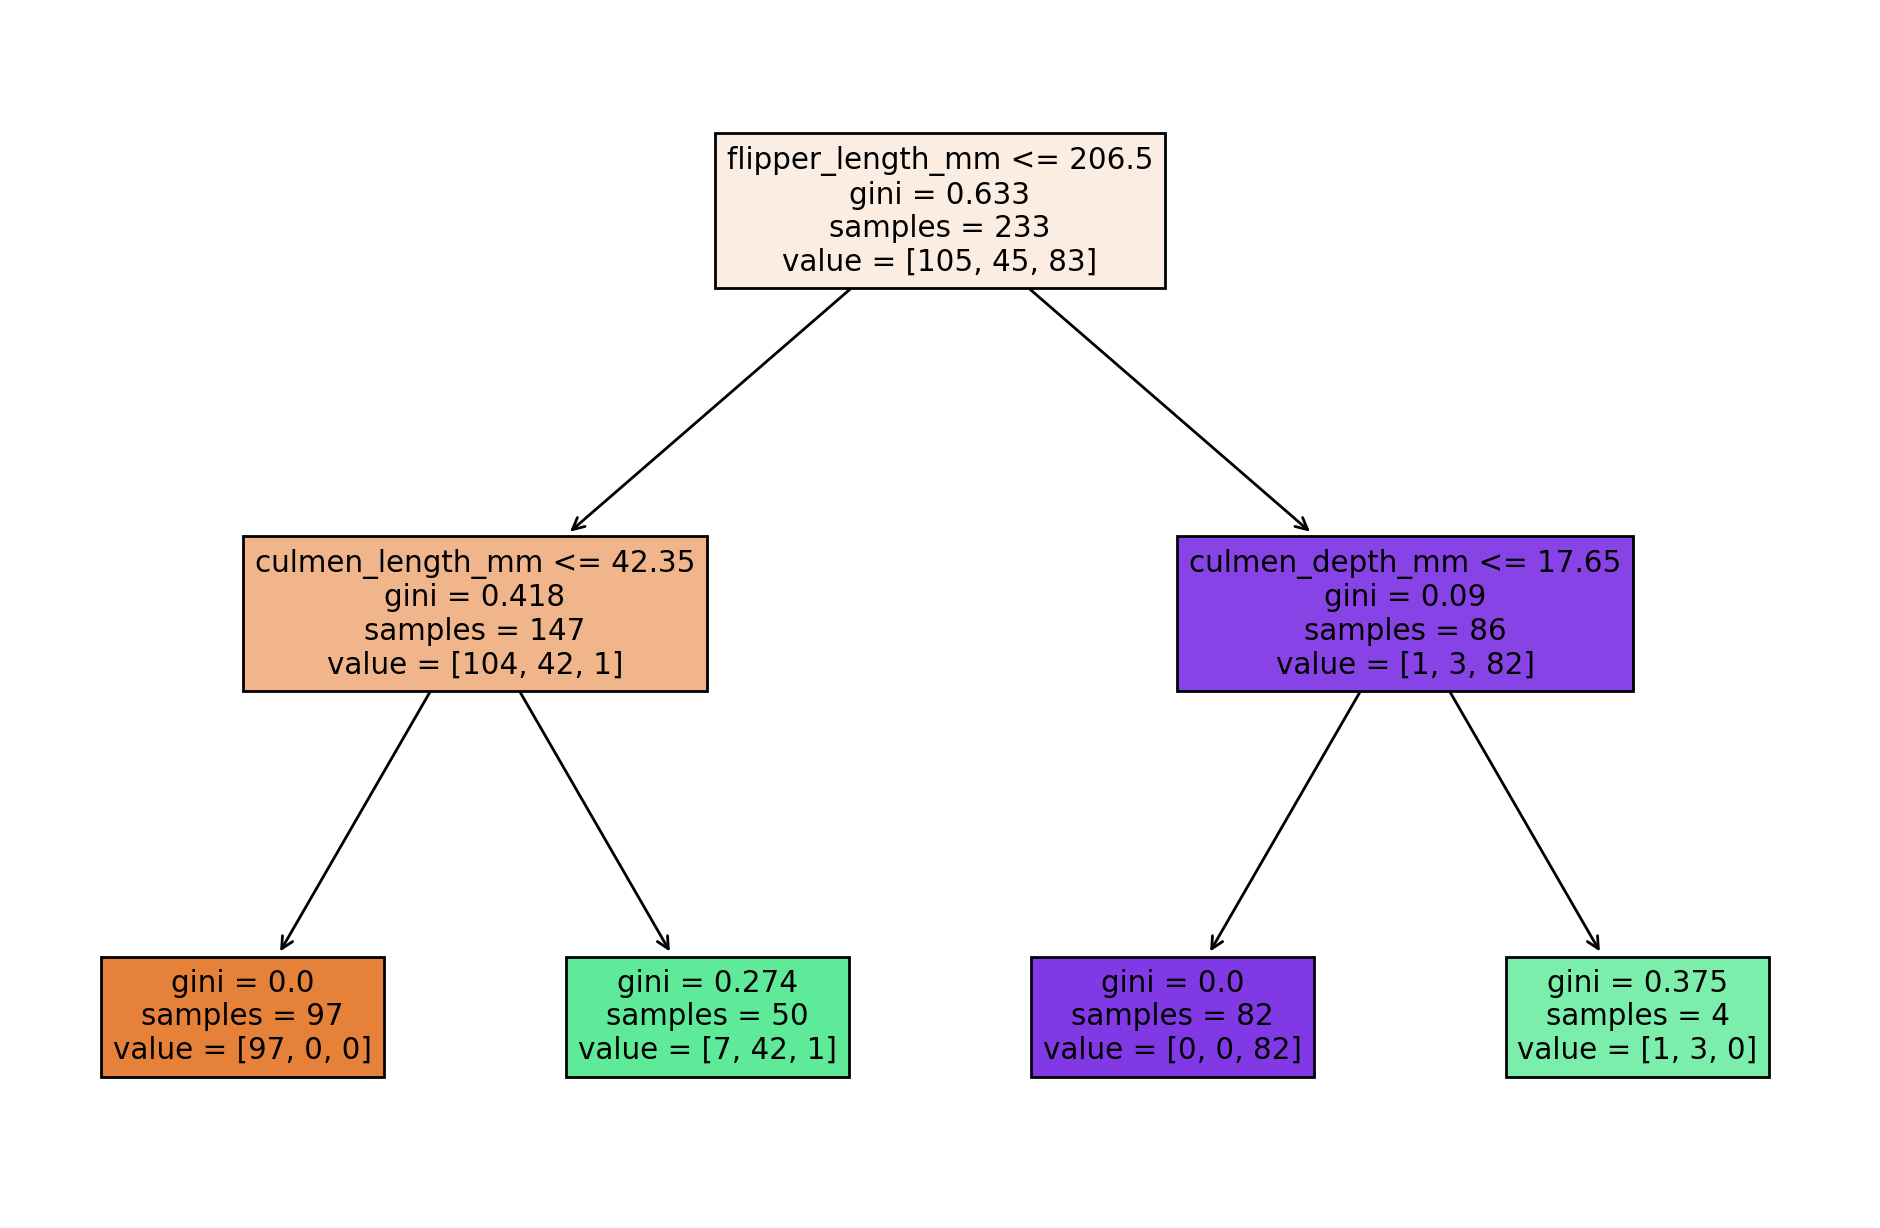

In [39]:
report_model(pruned_tree)

In [40]:
# help(DecisionTreeClassifier)

In [41]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)

In [42]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





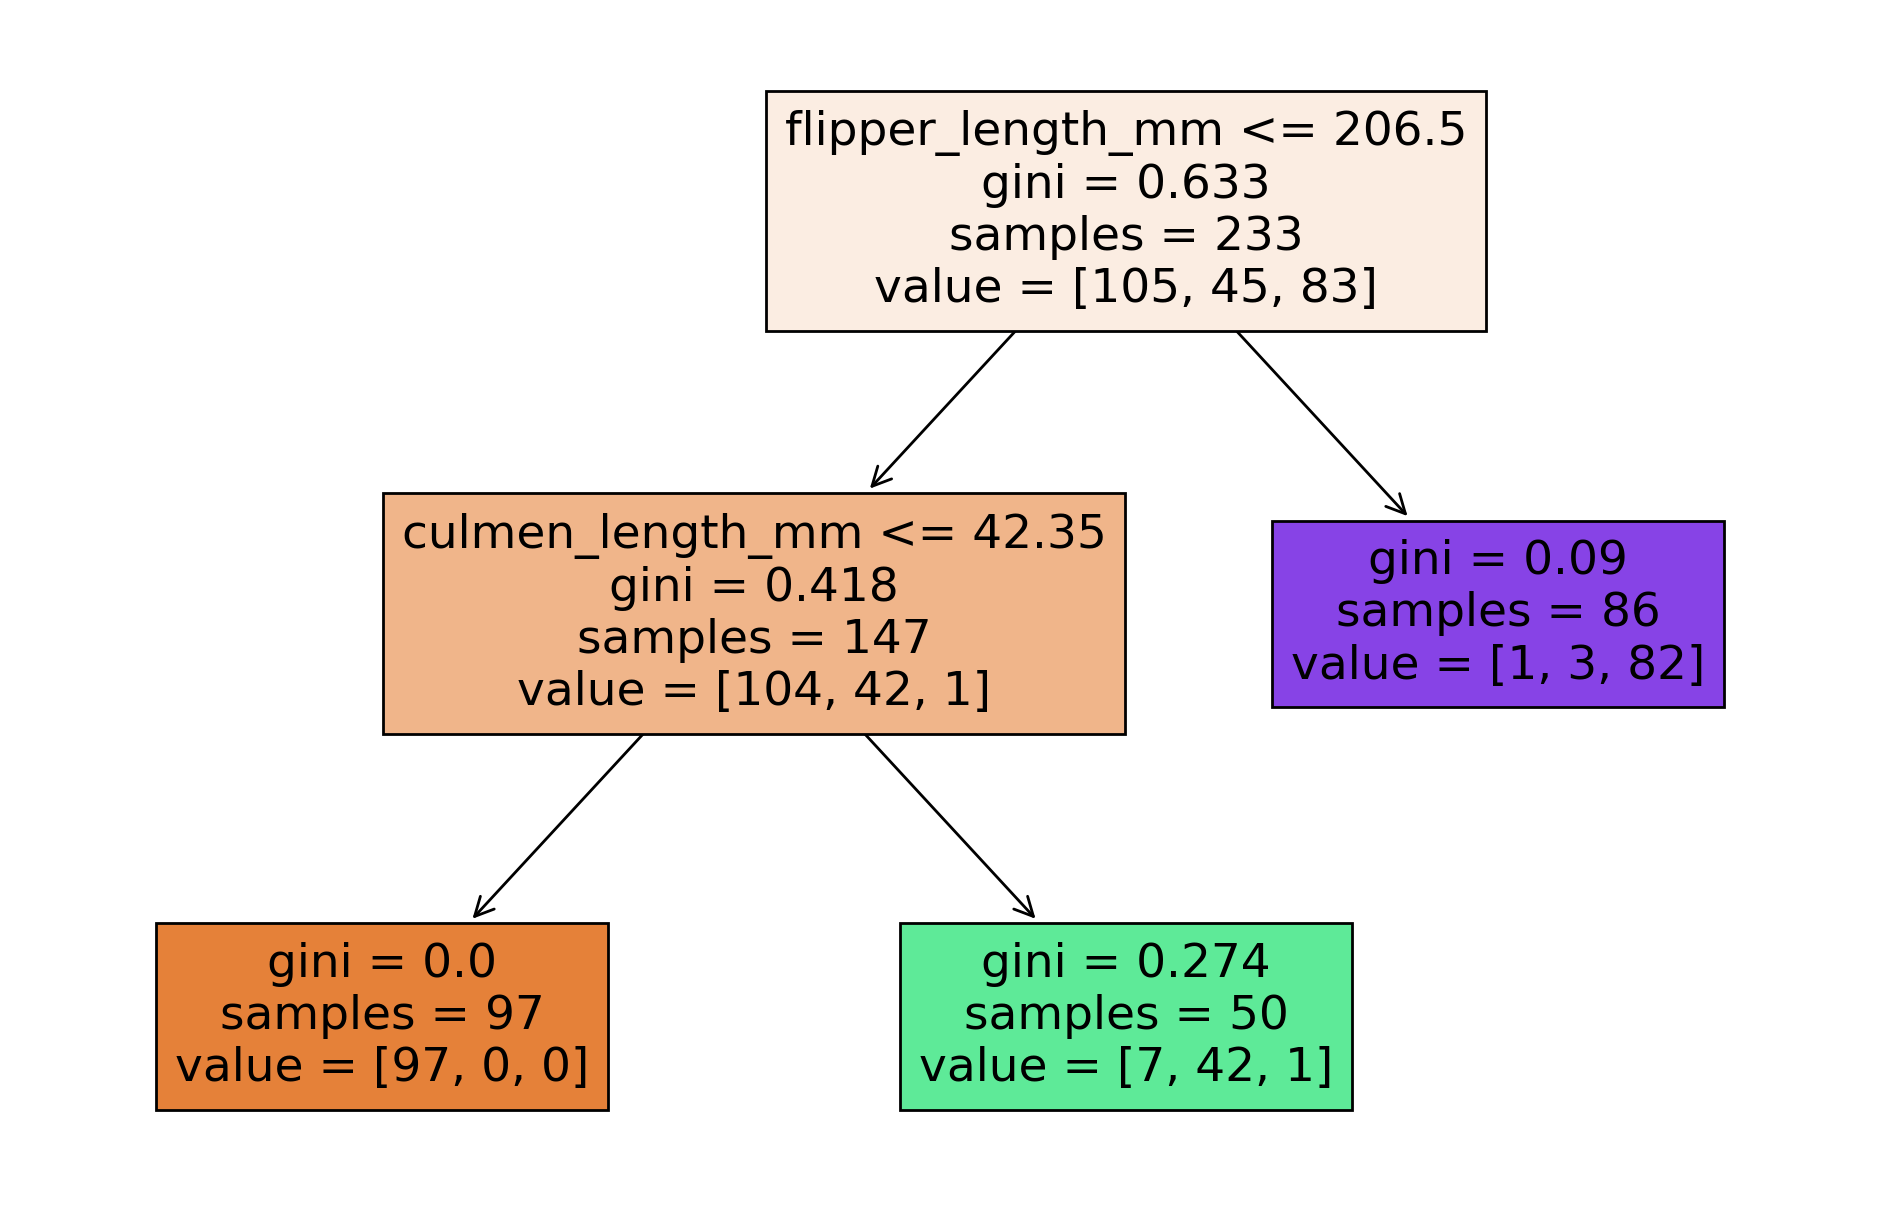

In [43]:
report_model(max_leaf_tree)

In [44]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')

In [45]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





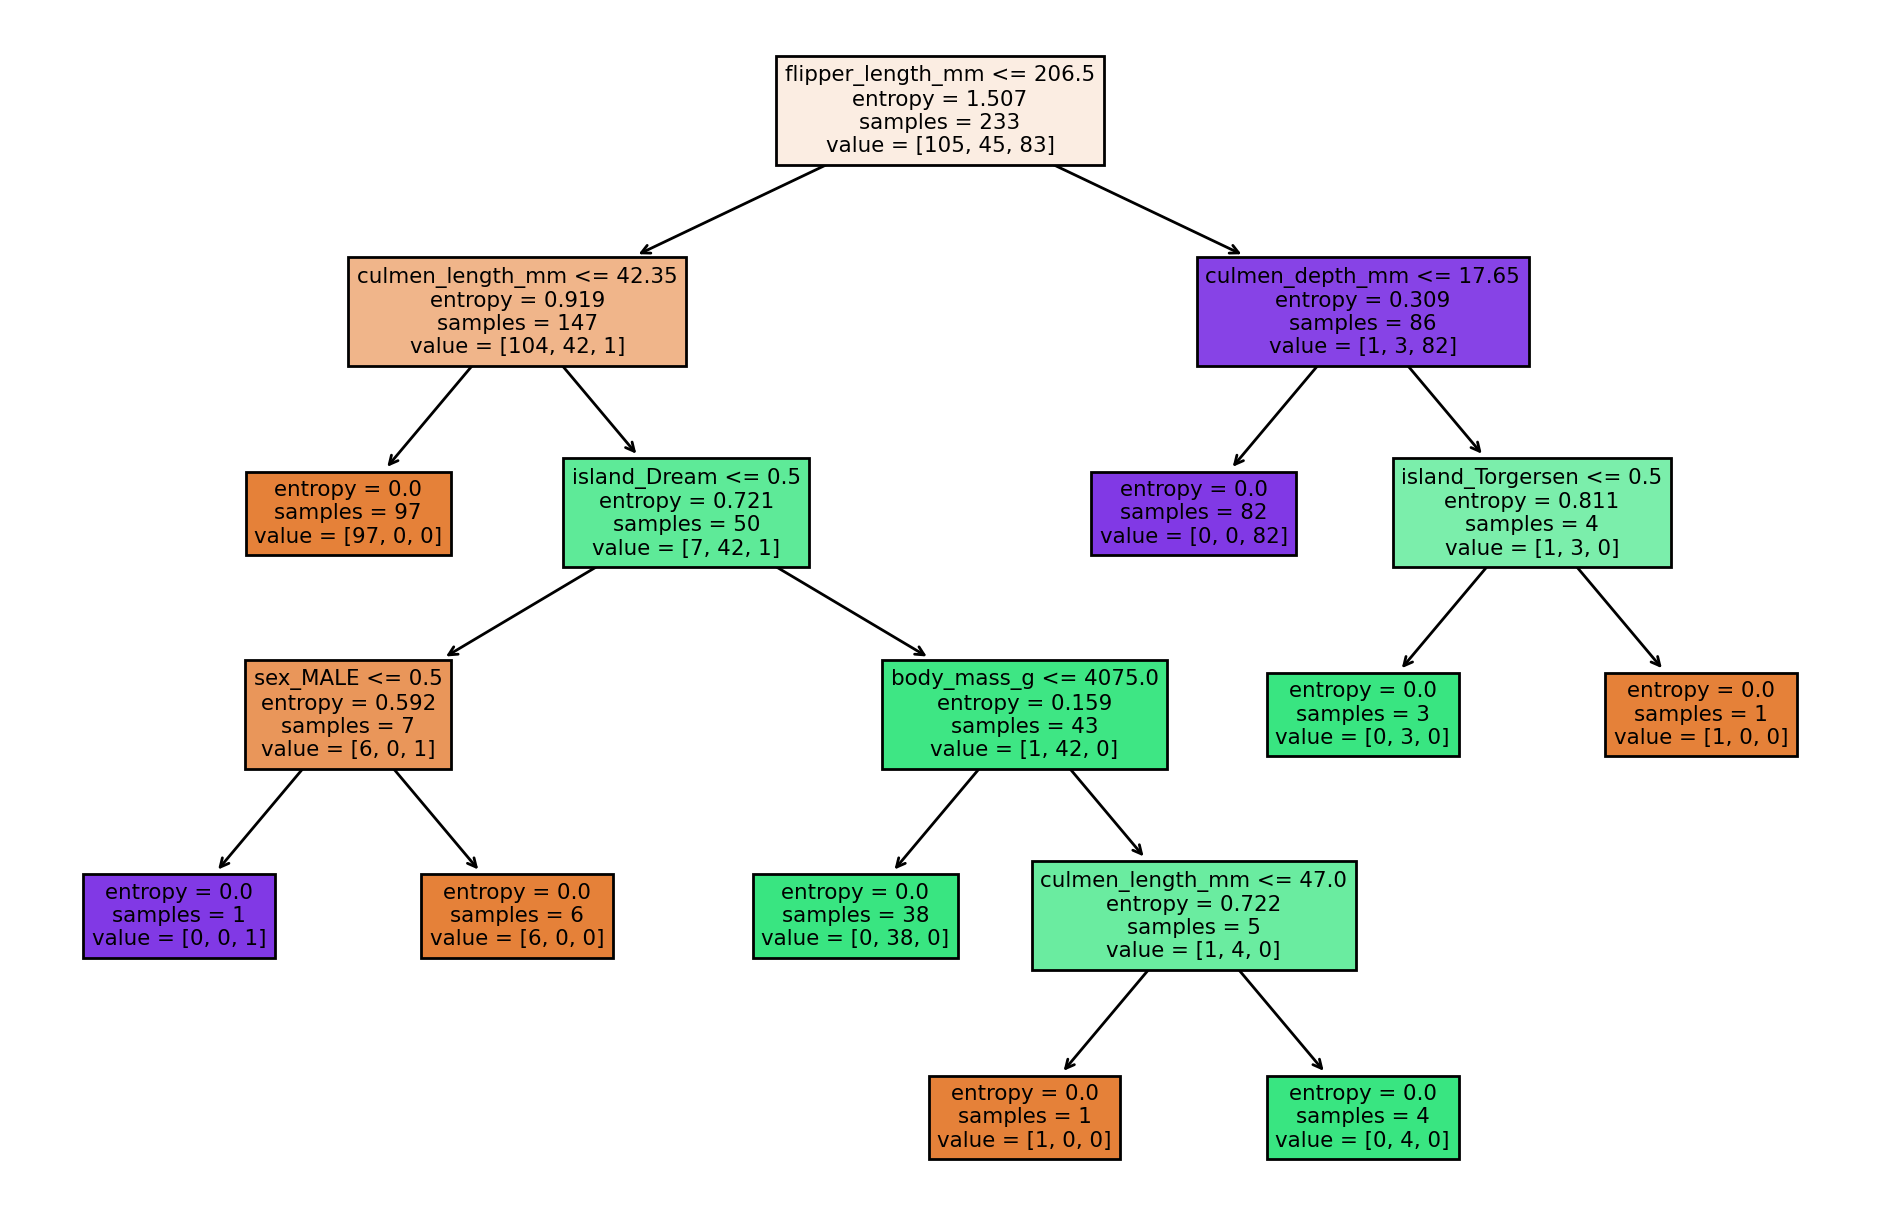

In [46]:
report_model(entropy_tree)

# Random Forests Classifier

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(n_estimators = 10, max_features = 'auto', random_state = 101)

In [51]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [52]:
preds = rfc.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

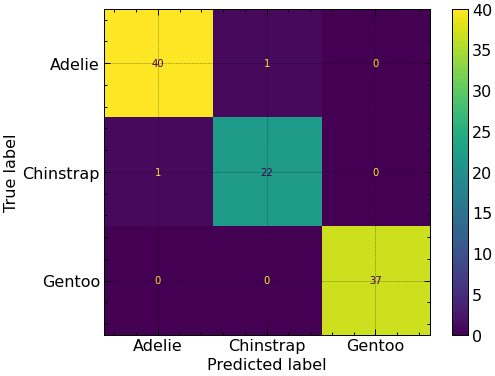

In [54]:
plot_confusion_matrix(rfc, X_test, y_test)

In [55]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [56]:
rfc.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

## Random Forests with a Grid Search

In [57]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\data_banknote_authentication.csv')

In [58]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


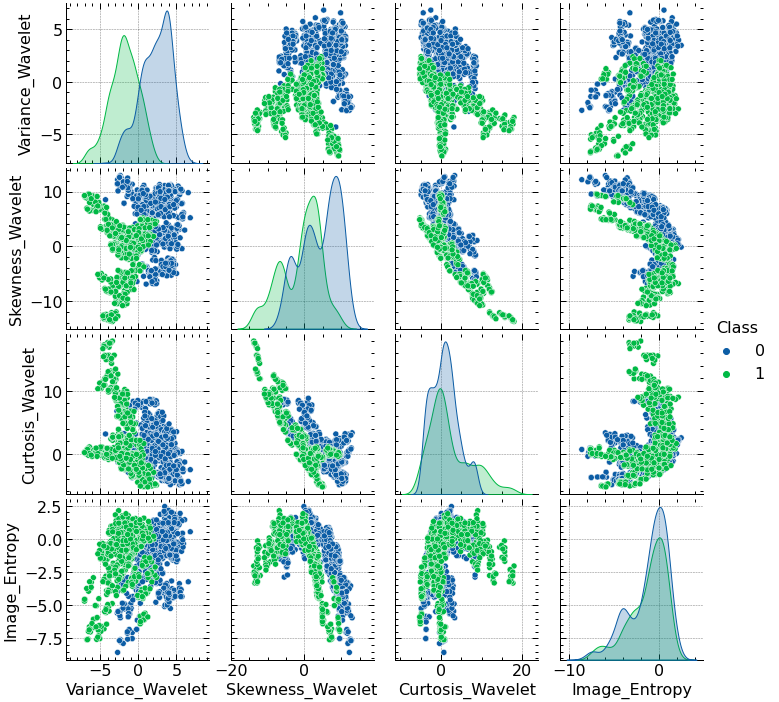

In [60]:
sns.pairplot(df, hue = 'Class')

In [61]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# help(RandomForestClassifier)

In [67]:
n_estimators = [64, 100, 128, 200]

In [68]:
max_features = [2,3,4]

In [69]:
bootstrap = [True, False]

In [70]:
oob_score = [True, False]

In [71]:
param_grid = {'n_estimators' : n_estimators, 'max_features': max_features, 'bootstrap' : bootstrap, 'oob_score' : oob_score}

In [72]:
rfc = RandomForestClassifier()

In [73]:
grid = GridSearchCV(rfc, param_grid)

In [74]:
grid.fit(X_train, y_train)

C:\Users\henri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\henri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\henri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\henri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\henri\anaconda

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [75]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [76]:
rfc = RandomForestClassifier(max_features = 2, n_estimators = 64, oob_score = True)

In [77]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [78]:
rfc.oob_score_

0.9948542024013722

In [79]:
predictions = rfc.predict(X_test)

In [80]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



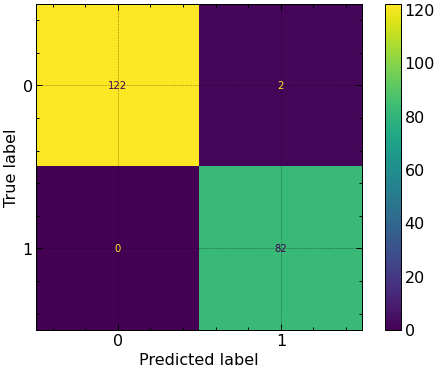

In [82]:
plot_confusion_matrix(rfc, X_test, y_test)

In [83]:
errors = []
misclassifications = []

for n in range(1,200):
    
    rfc = RandomForestClassifier(n_estimators = n, max_features = 2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

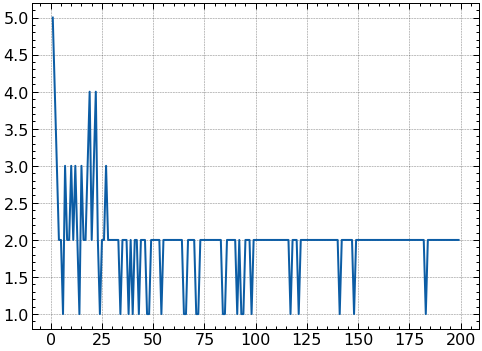

In [84]:
plt.plot(range(1,200), misclassifications)

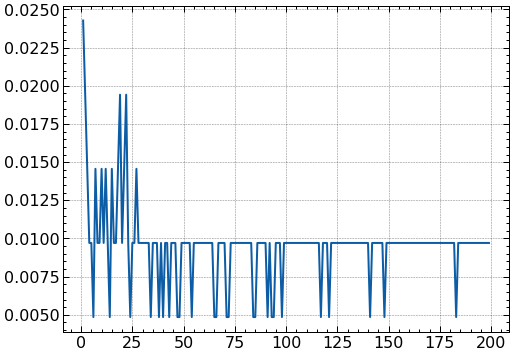

In [85]:
plt.plot(range(1,200), errors)

## Random Forests Regressor

In [86]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\rock_density_xray.csv')

In [87]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [88]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

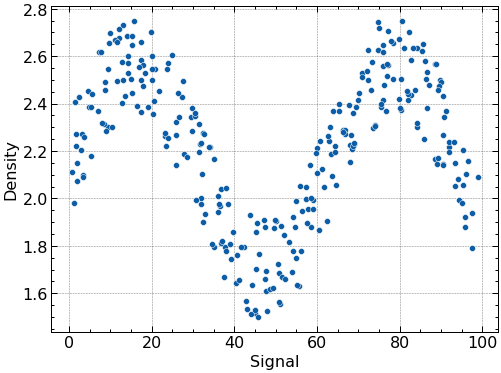

In [89]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

Linear Regression

In [90]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lr_model = LinearRegression()

In [95]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [96]:
lr_preds = lr_model.predict(X_test)

In [97]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [100]:
RMSE = np.sqrt(mean_squared_error(y_test, lr_preds))
RMSE

0.2570051996584629

In [101]:
signal_range = np.arange(0,100)
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

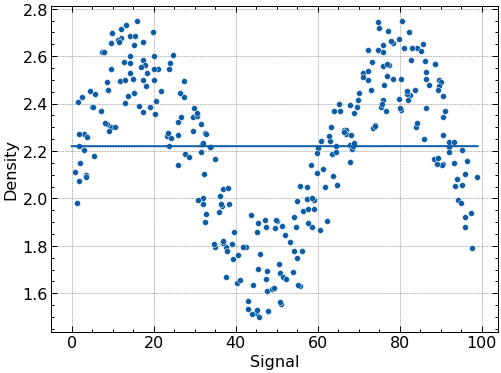

In [102]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)
plt.plot(signal_range, signal_preds)

Polynomial Regression

In [103]:
def run_model(model, X_test, y_test, X_train, y_train):
    
    # fit model training
    model.fit(X_train, y_train)
    
    # get metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # plot results model signal range
    
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    sns.scatterplot(x = 'Signal', y = 'Density', data = df, color = 'black')
    plt.plot(signal_range, signal_preds)  

MAE: 0.211198973318633
RMSE: 0.2570051996584629


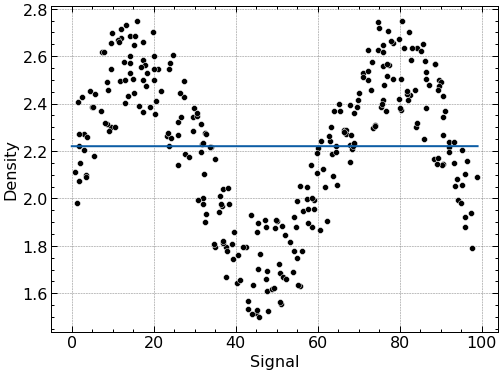

In [104]:
model = LinearRegression()
run_model(model, X_test, y_test, X_train, y_train)

In [105]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [106]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())

MAE: 0.11969085253552043
RMSE: 0.13807383449323551


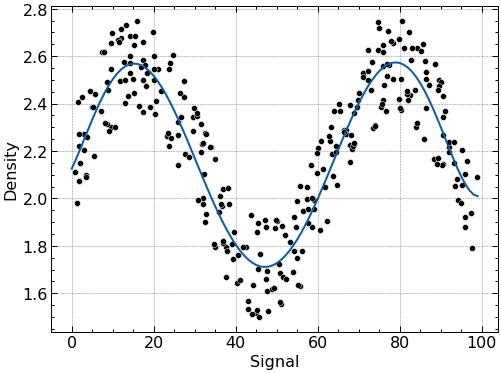

In [107]:
run_model(pipe, X_test, y_test, X_train, y_train)

Advanced Models

In [108]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.154941456006781
RMSE: 0.19098326636868565
MAE: 0.16373815203577283
RMSE: 0.2071543219512328
MAE: 0.264259275079173
RMSE: 0.3231175274749877


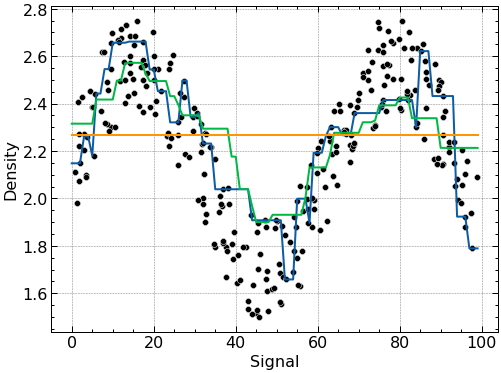

In [109]:
k_values = [1,5,30]

for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [110]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.154941456006781
RMSE: 0.19098326636868565


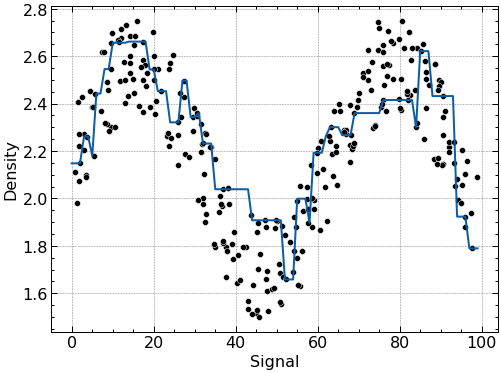

In [111]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [112]:
from sklearn.svm import SVR

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma': ['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)

MAE: 0.12311210454675882
RMSE: 0.14695165326493703


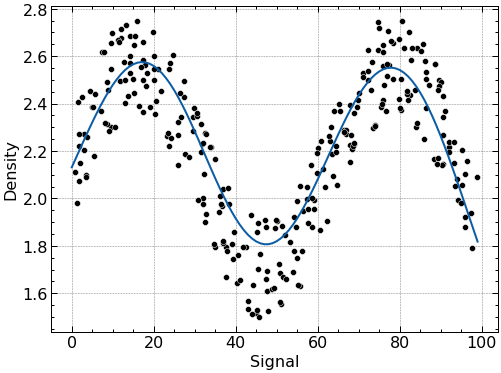

In [115]:
run_model(grid, X_train, y_train, X_test, y_test)

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
rfr = RandomForestRegressor(n_estimators = 10)

MAE: 0.1486480892489034
RMSE: 0.1870143036284077


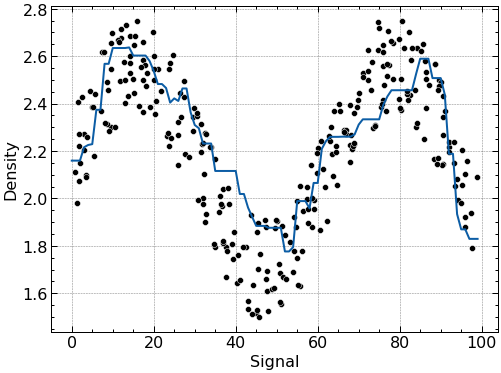

In [118]:
run_model(rfr, X_train, y_train, X_test, y_test)

## Boosting Methods (can work with any ML model but works best with decision trees)

# Adaptive Boosting

In [119]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\mushrooms.csv')

In [120]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<AxesSubplot:xlabel='class', ylabel='count'>

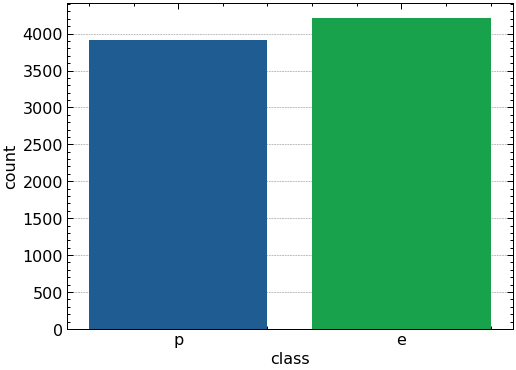

In [121]:
sns.countplot(data = df, x = 'class')

In [122]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

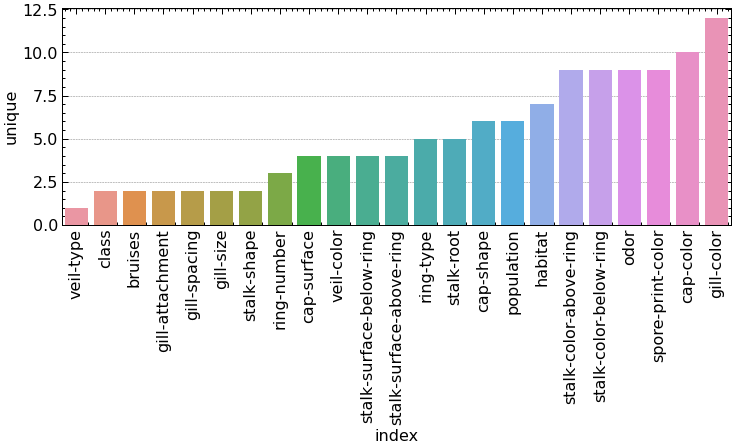

In [123]:
plt.figure(figsize = (12,4))
sns.barplot(data = feat_uni, x ='index', y = 'unique')
plt.xticks(rotation = 90);

In [124]:
X = df.drop('class', axis = 1)

In [125]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [126]:
X = pd.get_dummies(X, drop_first = True)

In [127]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [128]:
y = df['class']

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
model = AdaBoostClassifier(n_estimators = 1)

In [133]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [134]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [135]:
predictions = model.predict(X_test)

In [136]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [137]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [138]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [139]:
model.feature_importances_.argmax()

22

In [140]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

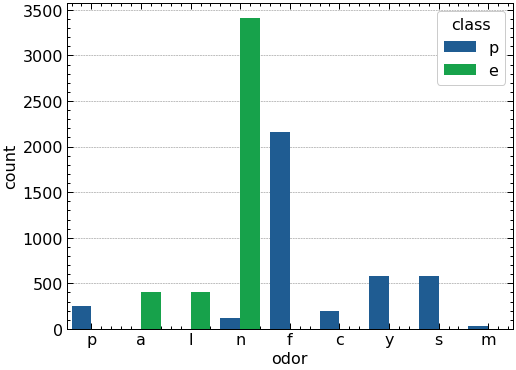

In [141]:
sns.countplot(data = df, x = 'odor', hue = 'class')

In [142]:
len(X.columns)

95

In [143]:
error_rates = []

for n in range (1,96):
    model = AdaBoostClassifier(n_estimators = n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)

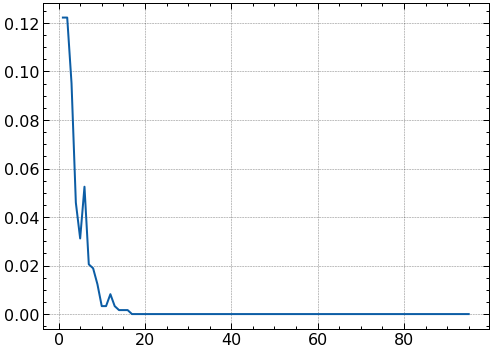

In [144]:
plt.plot(range(1,96), error_rates)

In [145]:
feats = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Importance'])

In [146]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [147]:
imp_feats = feats[feats['Importance']>0]

In [148]:
imp_feats

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


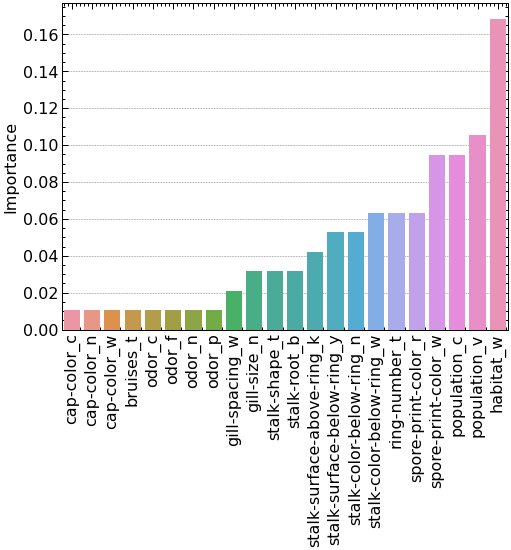

In [149]:
sns.barplot(data = imp_feats.sort_values('Importance'), x = imp_feats.index, y = 'Importance')
plt.xticks(rotation = 90);

## Gradient Boosting

In [150]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [151]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [152]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=122)

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
param_grid = {'n_estimators': [50,100], 'learning_rate': [0.1,0.05,0.2], 'max_depth': [3,4,5]}

In [158]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

In [159]:
grid = GridSearchCV(gb_model, param_grid)

In [160]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [161]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [162]:
predictions = grid.predict(X_test)

In [163]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=4)

In [164]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [165]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       590
           p       1.00      1.00      1.00       629

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [166]:
feat_import = grid.best_estimator_.feature_importances_

In [167]:
imp_feat = pd.DataFrame(index = X.columns, data = feat_import, columns = ['Importance'])

In [170]:
imp_feat.sort_values('Importance')

,Importance
gill-color_k,-4.553302e-17
cap-shape_k,-4.957406e-20
habitat_w,0.000000e+00
stalk-color-below-ring_n,0.000000e+00
gill-color_o,0.000000e+00
...,...
spore-print-color_r,3.380472e-02
stalk-surface-below-ring_y,6.558585e-02
bruises_t,6.728642e-02
stalk-root_c,1.149445e-01


In [171]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

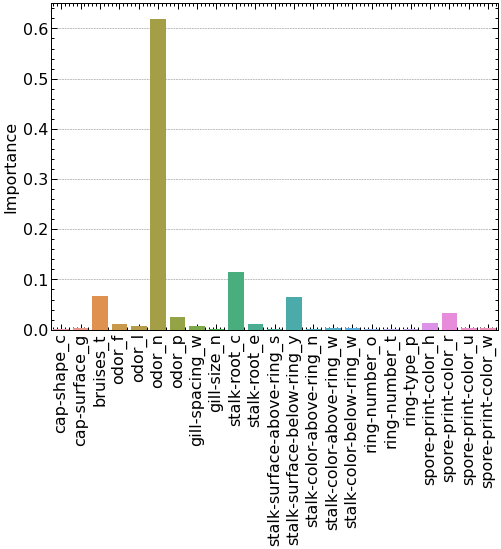

In [173]:
sns.barplot(data = imp_feat, x = imp_feat.index, y = 'Importance')
plt.xticks(rotation = 90);